В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((15000, 14), (10000, 13))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [5]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [6]:
train_df, val_df = train_test_split(train, stratify=train['Exited'], test_size=0.2, random_state=42)

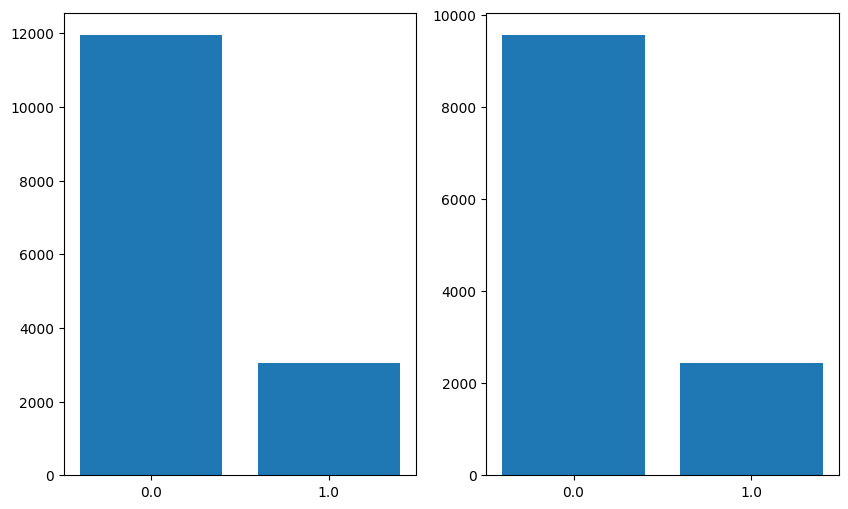

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].bar(train['Exited'].value_counts().index.astype(str), train['Exited'].value_counts().values)
ax[1].bar(train_df['Exited'].value_counts().index.astype(str), train_df['Exited'].value_counts().values)

plt.show()

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [8]:
input_cols = train_df.columns[:-1]
target_col = 'Exited'

train_inputs=train_df[input_cols]
train_targets=train_df[target_col]

val_inputs=val_df[input_cols]
val_targets=val_df[target_col]

In [9]:
display(train_inputs.head(), train_targets.head())
display(val_inputs.head(), val_targets.head())

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7180,7180,15652218.0,Mays,682.0,France,Male,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24
10393,10393,15592937.0,Ch'eng,684.0,France,Female,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31
80,80,15774586.0,Ch'in,705.0,Germany,Male,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01
3365,3365,15780572.0,K?,669.0,Spain,Male,58.0,0.0,0.00,2.0,0.0,1.0,51565.98
12236,12236,15642099.0,Trevisani,707.0,France,Male,21.0,3.0,0.00,2.0,1.0,1.0,148564.76


7180     0.0
10393    0.0
80       0.0
3365     0.0
12236    0.0
Name: Exited, dtype: float64

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6490,6490,15794345.0,Pirozzi,714.0,Germany,Male,46.0,1.0,115764.32,4.0,1.0,1.0,72945.32
3646,3646,15617348.0,Ritchie,593.0,France,Male,41.0,5.0,0.00,2.0,1.0,1.0,38196.24
5306,5306,15787907.0,Hs?eh,731.0,France,Female,38.0,2.0,0.00,2.0,0.0,1.0,116971.05
652,652,15803378.0,Onio,673.0,France,Female,43.0,4.0,155739.76,1.0,0.0,1.0,111622.76
2627,2627,15772423.0,Genovesi,678.0,Spain,Female,30.0,4.0,0.00,2.0,1.0,0.0,143681.85


6490    1.0
3646    0.0
5306    0.0
652     0.0
2627    0.0
Name: Exited, dtype: float64

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [10]:
train_inputs.dtypes

id                   int64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object

In [11]:
numeric_cols = train_inputs.select_dtypes(['float', 'int']).columns
categorical_cols = train_inputs.select_dtypes(['object']).columns

numeric_cols, categorical_cols

(Index(['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
        'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
       dtype='object'),
 Index(['Surname', 'Geography', 'Gender'], dtype='object'))

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [12]:
train_inputs.describe().round(2)

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,7479.63,15690923.99,658.84,37.69,5.03,43008.17,1.59,0.79,0.49,117992.40
std,4334.09,146930.97,72.33,8.14,2.78,59906.63,0.53,0.41,0.50,45589.48
min,0.00,1581102.00,431.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,3725.75,15635116.00,603.00,32.00,3.00,0.00,1.00,1.00,0.00,83343.73
50%,7471.50,15689953.00,661.00,37.00,5.00,0.00,2.00,1.00,0.00,123613.91
75%,11231.25,15756921.50,708.00,42.00,7.00,109949.05,2.00,1.00,1.00,156912.81
max,14999.00,15815690.00,850.00,74.00,10.00,209767.31,4.00,1.00,1.00,199992.48


На даному етапі, первинні параметри моделі будуть оброблені наступним чином, в подальшому змінимо обробку в сторону покращення моделі:
* StandardScaler для трансформації числових значень
* OneHotEncoder для трансформації категоріальних значень
* Видалено колонку `Surname` так як я вважаю, що на даному етапі прізище не несе значущої інформації про клієнта, це щось "унікальне", тим паче щоб не збивати модель і для нового клієнта з таким ж прізвищем не були передбачені однакові показники
* Видалимо колонку `CustomerId`, оскільки вона не несе цінності для побудови моделі

In [13]:
train_inputs[categorical_cols].head()

,Surname,Geography,Gender
7180,Mays,France,Male
10393,Ch'eng,France,Female
80,Ch'in,Germany,Male
3365,K?,Spain,Male
12236,Trevisani,France,Male


In [14]:
train_inputs[categorical_cols].nunique()

Surname      732
Geography      3
Gender         2
dtype: int64

Я вважаю, що зміна `Surname` не є значущою для нас, оскільки прізвище це щось "унікальне" для кожної людини. Також якщо в обох людей одне і те ж прізвище, це не означає що в обох людей однакові фінансові показники, тому на даному етапі я видалю з набору цю змінну.

In [15]:
train_inputs.drop(columns=['Surname'], inplace=True)
val_inputs.drop(columns=['Surname'], inplace=True)

Видалили з наборів даних та видалимо із змінної `categorical_cols`

In [16]:
train_inputs.drop(columns=['CustomerId', 'id'], inplace=True)
val_inputs.drop(columns=['CustomerId', 'id'], inplace=True)

In [17]:
categorical_cols = train_inputs.select_dtypes(['object']).columns
numeric_cols = train_inputs.select_dtypes(['int', 'float']).columns

In [18]:
categorical_cols, numeric_cols

(Index(['Geography', 'Gender'], dtype='object'),
 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary'],
       dtype='object'))

In [19]:
standard_scaler = StandardScaler()
standard_scaler.fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = standard_scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = standard_scaler.transform(val_inputs[numeric_cols])

In [20]:
train_inputs.describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00,12000.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.15,-2.42,-1.81,-0.72,-1.11,-1.94,-0.98,-2.59
25%,-0.77,-0.70,-0.73,-0.72,-1.11,0.52,-0.98,-0.76
50%,0.03,-0.08,-0.01,-0.72,0.77,0.52,-0.98,0.12
75%,0.68,0.53,0.71,1.12,0.77,0.52,1.02,0.85
max,2.64,4.46,1.79,2.78,4.52,0.52,1.02,1.80


In [21]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [22]:
one_hot_encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [23]:
encoded_cols = list(one_hot_encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [24]:
one_hot_encoder.transform(train_inputs[categorical_cols])[:10]

array([[1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [25]:
train_inputs[encoded_cols] = one_hot_encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = one_hot_encoder.transform(val_inputs[categorical_cols])

In [26]:
display(train_inputs.head(), val_inputs.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.320187,France,Male,-0.944682,-1.447264,1.475464,-1.108193,0.515062,1.016977,0.569450,1.0,0.0,0.0,0.0,1.0
10393,0.347838,France,Female,0.161227,-1.087792,2.254434,-1.108193,0.515062,-0.983306,0.603803,1.0,0.0,0.0,1.0,0.0
80,0.638166,Germany,Male,-0.330288,0.350096,1.223831,0.769304,0.515062,-0.983306,1.238026,0.0,1.0,0.0,0.0,1.0
3365,0.140460,Spain,Male,2.495924,-1.806736,-0.717950,0.769304,-1.941514,1.016977,-1.457116,0.0,0.0,1.0,0.0,1.0
12236,0.665816,France,Male,-2.050591,-0.728320,-0.717950,0.769304,0.515062,1.016977,0.670629,1.0,0.0,0.0,0.0,1.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.762592,Germany,Male,1.021379,-1.447264,1.214543,4.524299,0.515062,1.016977,-0.988144,0.0,1.0,0.0,0.0,1.0
3646,-0.910252,France,Male,0.406985,-0.009376,-0.717950,0.769304,0.515062,1.016977,-1.750392,1.0,0.0,0.0,0.0,1.0
5306,0.997620,France,Female,0.038348,-1.087792,-0.717950,0.769304,-1.941514,1.016977,-0.022404,1.0,0.0,0.0,1.0,0.0
652,0.195761,France,Female,0.652742,-0.368848,1.881867,-1.108193,-1.941514,1.016977,-0.139723,1.0,0.0,0.0,1.0,0.0
2627,0.264887,Spain,Female,-0.944682,-0.368848,-0.717950,0.769304,0.515062,-0.983306,0.563519,0.0,0.0,1.0,1.0,0.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

Оскільки в `train_inputs` та `val_inputs` присутні категоріальні змінні `Geography` та `Gender`, доцільно їх прибрати в подальшому на навчання моделі, проте на даному етапі пропустимо це, для збереження цільної структури

In [27]:
print(f"train_inputs: {train_inputs.shape}")
print(f"train_targets: {train_targets.shape}")
print(f"val_inputs: {val_inputs.shape}")
print(f"val_targets: {val_targets.shape}")

train_inputs: (12000, 15)
train_targets: (12000,)
val_inputs: (3000, 15)
val_targets: (3000,)


In [28]:
pd.DataFrame(train_inputs).to_parquet('train_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_inputs).to_parquet('val_inputs.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

In [29]:
import os

os.listdir('/')

['home',
 'usr',
 'bin',
 'sbin',
 '.file',
 'etc',
 'var',
 'Library',
 'System',
 '.VolumeIcon.icns',
 'private',
 '.vol',
 'Users',
 'Applications',
 'opt',
 'dev',
 'Volumes',
 'tmp',
 'cores']

6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [30]:
from sklearn.linear_model import LogisticRegression

X_train = train_inputs[list(numeric_cols.values) + encoded_cols]
X_val = val_inputs[list(numeric_cols.values) + encoded_cols]

model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [31]:
train_preds = model.predict(X_train)
train_preds_proba = model.predict_proba(X_train)

In [32]:
train_preds[:10], train_targets[:10]

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 7180     0.0
 10393    0.0
 80       0.0
 3365     0.0
 12236    0.0
 11937    0.0
 3717     0.0
 859      1.0
 13006    0.0
 6685     0.0
 Name: Exited, dtype: float64)

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

In [33]:
def plot_predict(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy))

    cf = confusion_matrix(targets, preds, normalize='true')
    fig = plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.title("{} Confusion Matrix".format(name))

    plt.show()

Confusion Matrix:
[[9156  402]
 [1103 1339]]

Normalized Confusion Matrix:
[[0.95794099 0.04205901]
 [0.45167895 0.54832105]]
Accuracy: 0.87%


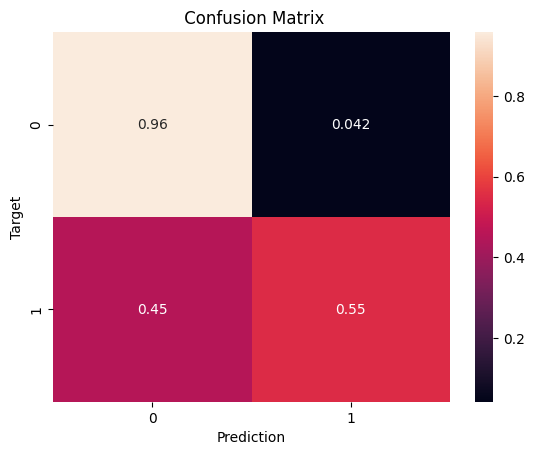

In [34]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score

print("Confusion Matrix:\n{}\n".format(confusion_matrix(train_targets, train_preds)))
print("Normalized Confusion Matrix:\n{}".format(confusion_matrix(train_targets, train_preds, normalize='true')))

plot_predict(X_train, train_targets)

Accuracy: 0.87%


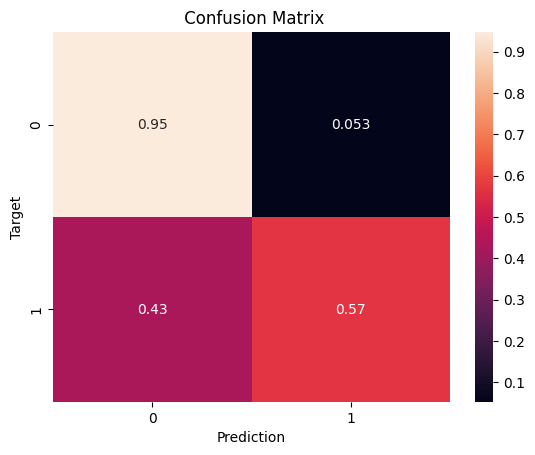

In [35]:
plot_predict(X_val, val_targets)

In [36]:
def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

AUROC for Train: 0.88


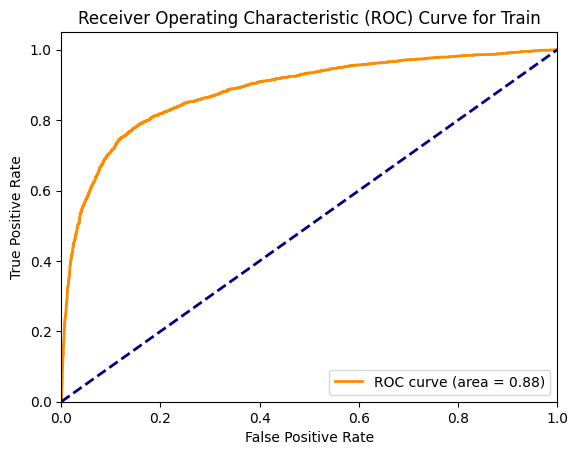

AUROC for Validation: 0.88


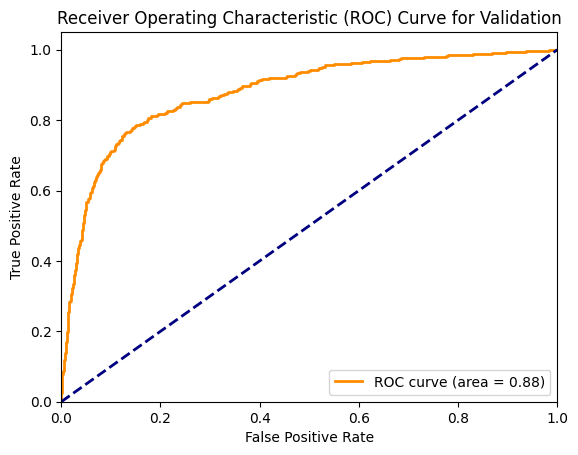

In [37]:
compute_auroc_and_build_roc(X_train, train_targets, 'Train')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

In [38]:
def get_f1_score(inputs, targets, name=''):
  preds = model.predict(inputs)

  f1_score_ = f1_score(targets, preds, pos_label=1)
  print(f"F1 score {name}: {f1_score_:.2f}%")

In [39]:
get_f1_score(X_train, train_targets, 'Train')
get_f1_score(X_val, val_targets, 'Validation')

F1 score Train: 0.64%
F1 score Validation: 0.64%


Модель виглядає непоганою, подобається те, що метрики однакові і на тренувальному наборі даних і на валідаційному. Проте не подобається значення помилки ІІ роду (False Negative) **0.43**. Воно є значним.

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [40]:
def all_0(inputs):
    return np.full(len(inputs), 0)

In [41]:
print("Точність моделі для усіх значень 0: {:.2f}%".format(100 * accuracy_score(val_targets, all_0(val_inputs))))
print("Точність нашої навченої моделі: {:.2f}%".format(100 * accuracy_score(val_targets, model.predict(X_val))))

Точність моделі для усіх значень 0: 79.67%
Точність нашої навченої моделі: 86.97%


Наша модель дає кращий результат, тому можемо сказати з впевненістю що наша модель краща за ту, яка завжди передбачатиме 0

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [42]:
import joblib

churn_model_0 = {
    'model': model,
    'scaler': standard_scaler,
    'encoder': one_hot_encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [43]:
joblib.dump(churn_model_0, 'churn_model_0.joblib')

['churn_model_0.joblib']

In [44]:
model_2 = joblib.load('churn_model_0.joblib')

In [45]:
accuracy_score(train_targets, model_2.get('model').predict(X_train))

0.8745833333333334

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [46]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [47]:
# predict_raw_df(standard_scaler, one_hot_encoder, numeric_cols, categorical_cols, raw_df[:5])

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [48]:
raw_df = pd.read_csv('test.csv')

raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [49]:
raw_df['Exited'] = predict_raw_df(standard_scaler, one_hot_encoder, list(numeric_cols.values), categorical_cols, raw_df)

In [50]:
raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,15000,15594796.0,Chu,-1.034678,Germany,Male,-0.944682,-1.087792,1.720173,-1.108193,0.515062,1.016977,0.875226,0.0,1.0,0.0,0.0,1.0,0.069393
1,15001,15642821.0,Mazzi,-1.490909,France,Male,0.161227,-0.009376,-0.717950,0.769304,0.515062,1.016977,-1.109098,1.0,0.0,0.0,0.0,1.0,0.033314
2,15002,15716284.0,Onyekachi,0.651991,France,Male,0.652742,1.069040,-0.717950,0.769304,0.515062,-0.983306,0.850584,1.0,0.0,0.0,0.0,1.0,0.153586
3,15003,15785078.0,Martin,0.804068,Spain,Male,0.898500,-0.728320,-0.717950,-1.108193,0.515062,1.016977,1.073044,0.0,0.0,1.0,0.0,1.0,0.199192
4,15004,15662955.0,Kenechukwu,-0.924077,Spain,Male,0.652742,1.069040,-0.717950,0.769304,0.515062,1.016977,0.563521,0.0,0.0,1.0,0.0,1.0,0.054281


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [51]:
sample_submission = pd.read_csv('sample_submission.csv')

sample_submission.head()

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [52]:
sample_submission_predicted = sample_submission.merge(raw_df[['id', 'Exited']], on='id')[['id', 'Exited_y']]

sample_submission_predicted.to_csv('submission_log_reg.csv', index=False)